In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# 나무 구조 시각화
from sklearn.tree import plot_tree

In [3]:
df_raw = pd.read_csv('data/body.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop(columns = 'FAT', inplace = False)

In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state=1234)

print('학습용 데이터의 X 크기: {}'.format(df_train_x.shape))
print('학습용 데이터의 Y 크기: {}'.format(df_train_y.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_x.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_y.shape))

학습용 데이터의 X 크기: (176, 13)
학습용 데이터의 Y 크기: (176,)
평가용 데이터의 X 크기: (76, 13)
평가용 데이터의 X 크기: (76,)


In [9]:
# 모델 생성, 기본 옵션으로 트리 생성

tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeRegressor(random_state=1234)

In [10]:
# 데이터 설명력

print('학습용 데이터의 설명력: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 설명력: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

학습용 데이터의 설명력: 1.000
평가용 데이터의 설명력: 0.345


###### 모델 파라미터 조정, Manual Search
- min_samples_leaf

In [11]:
#학습용 및 평가용 설명력 결과 저장
train_score = []
test_score = []

# min samples leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [14]:
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.345
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


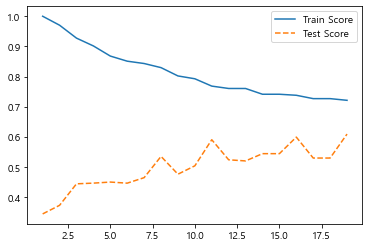

In [15]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

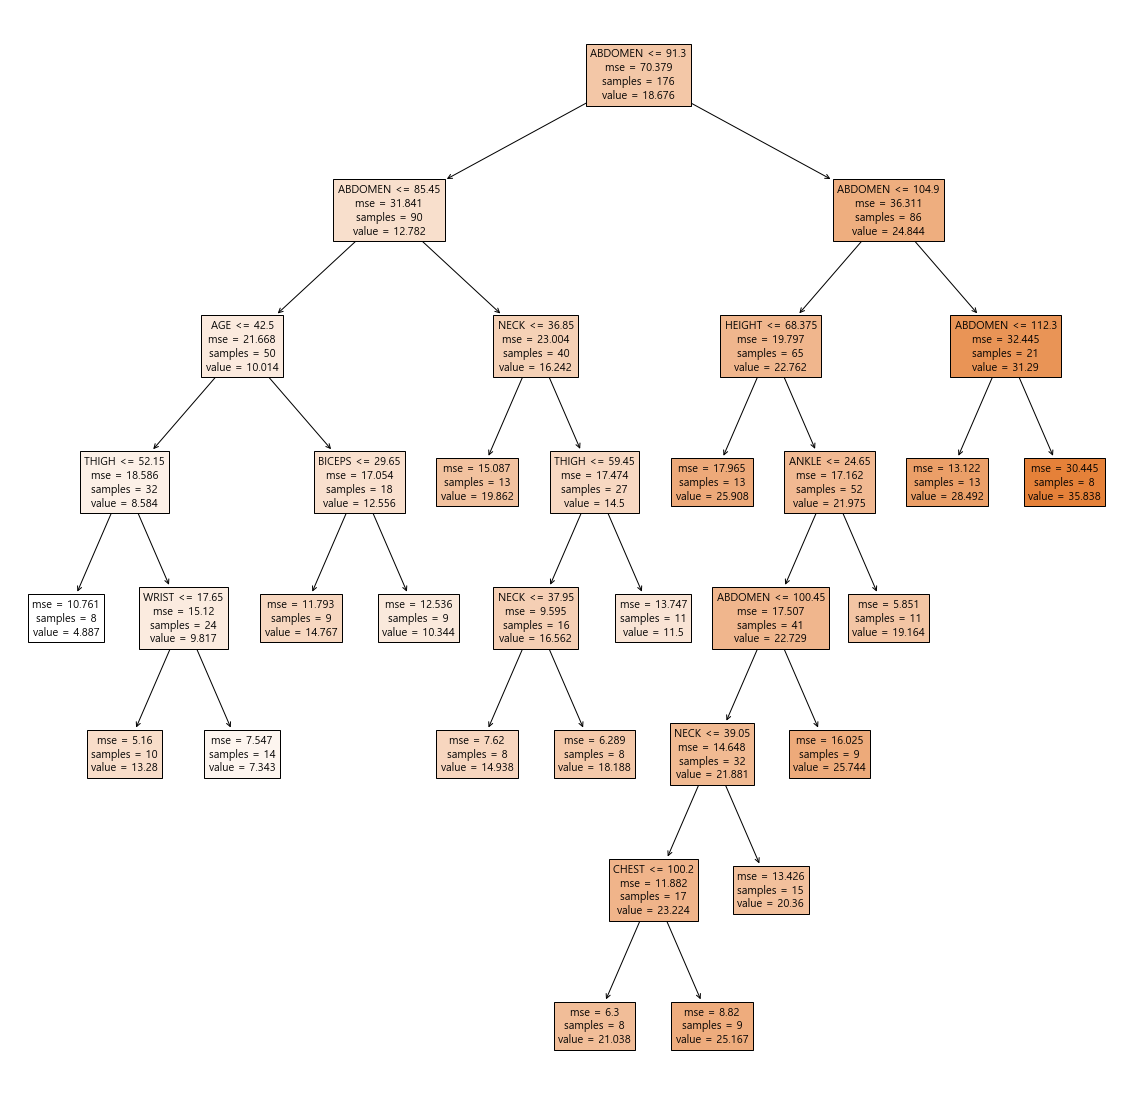

In [19]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료 수 = 8 로 지정한 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8)
tree_graph.fit(df_train_x, df_train_y)
plt.figure(figsize = (20, 20))
plot_tree(tree_graph, feature_names=v_feature_name, filled = True);

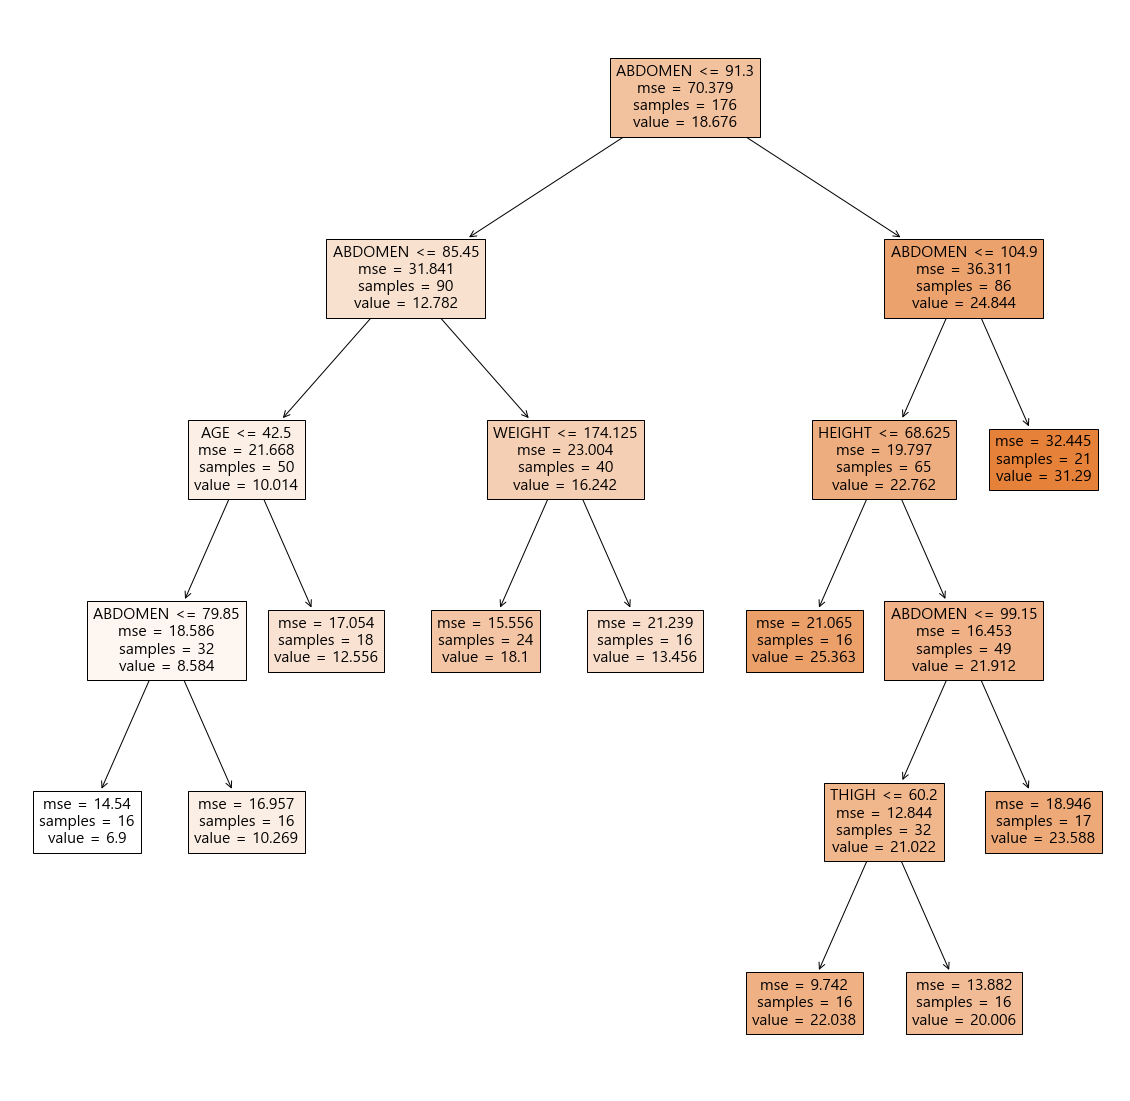

In [20]:
# 노드의 최소 자료 수 = 16 로 지정한 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 16)
tree_graph.fit(df_train_x, df_train_y)
plt.figure(figsize = (20, 20))
plot_tree(tree_graph, feature_names=v_feature_name, filled = True);

###### 모델 파라미터 조정, Manual Search
- min_samples_split

In [26]:
#학습용 및 평가용 설명력 결과 저장
train_score = []
test_score = []

# min samples split: 분리 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y)) 

In [27]:
# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


###### 모델 파라미터 조정, Manual Search
- max_depth

In [21]:
#학습용 및 평가용 설명력 결과 저장
train_score = []
test_score = []

# max depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=20, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y)) 

In [22]:
# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


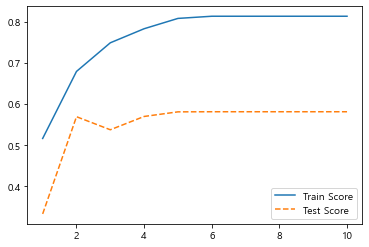

In [23]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

##### 모델 parameter 조정: GridSearch

In [29]:
estimator = DecisionTreeRegressor()

# 구하고자 하는 파라미터와 범위
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}
# 설명력이 높은 최적 파라미터 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs= -1) # r2 = 결정계수
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(max_depth=4, max_features='log2', min_samples_leaf=6,
                      min_samples_split=34)

best parameter: 
{'criterion': 'mse', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 34}

best score: 
0.624


##### 모델 parameter 조정: RandomSearch

In [30]:
estimator = DecisionTreeRegressor()

# 구하고자 하는 파라미터와 범위
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}
# 설명력이 높은 최적 파라미터 찾기
grid_dt = RandomizedSearchCV(estimator, param_grid, scoring = 'r2', n_jobs= -1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=9,
                      min_samples_split=14)

best parameter: 
{'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'mse'}

best score: 
0.546


In [31]:
# 그리드서치에는 CV가 포함됨
# 그럼 랜덤서치에도 CV가 포함인건지,,,,,,,?]

# 실습 데이터로 진행해보기

In [33]:
df_tire = pd.read_csv('data/tire_heat.csv')
df_tire.head()

,Y,Weight,Velocity,Shoulder,Temperature,Time
0,98,70,70,36.5,36,5
1,80,70,70,36.0,36,6
2,113,70,90,37.0,37,6
3,100,70,90,36.3,37,6
4,103,70,110,36.5,39,4


In [34]:
df_tire_y = df_tire['Y']
df_tire_x = df_tire.drop(columns = 'Y', inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_tire_x, df_tire_y, test_size = 0.3, random_state=1234)

In [35]:
estimator = DecisionTreeRegressor()

# 구하고자 하는 파라미터와 범위
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}
# 설명력이 높은 최적 파라미터 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs= -1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(max_depth=6, max_features='log2', min_samples_leaf=6,
                      min_samples_split=14)

best parameter: 
{'criterion': 'mse', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 14}

best score: 
0.934


In [42]:
grid_dt.score(df_test_x, df_test_y)

0.9371998935576644

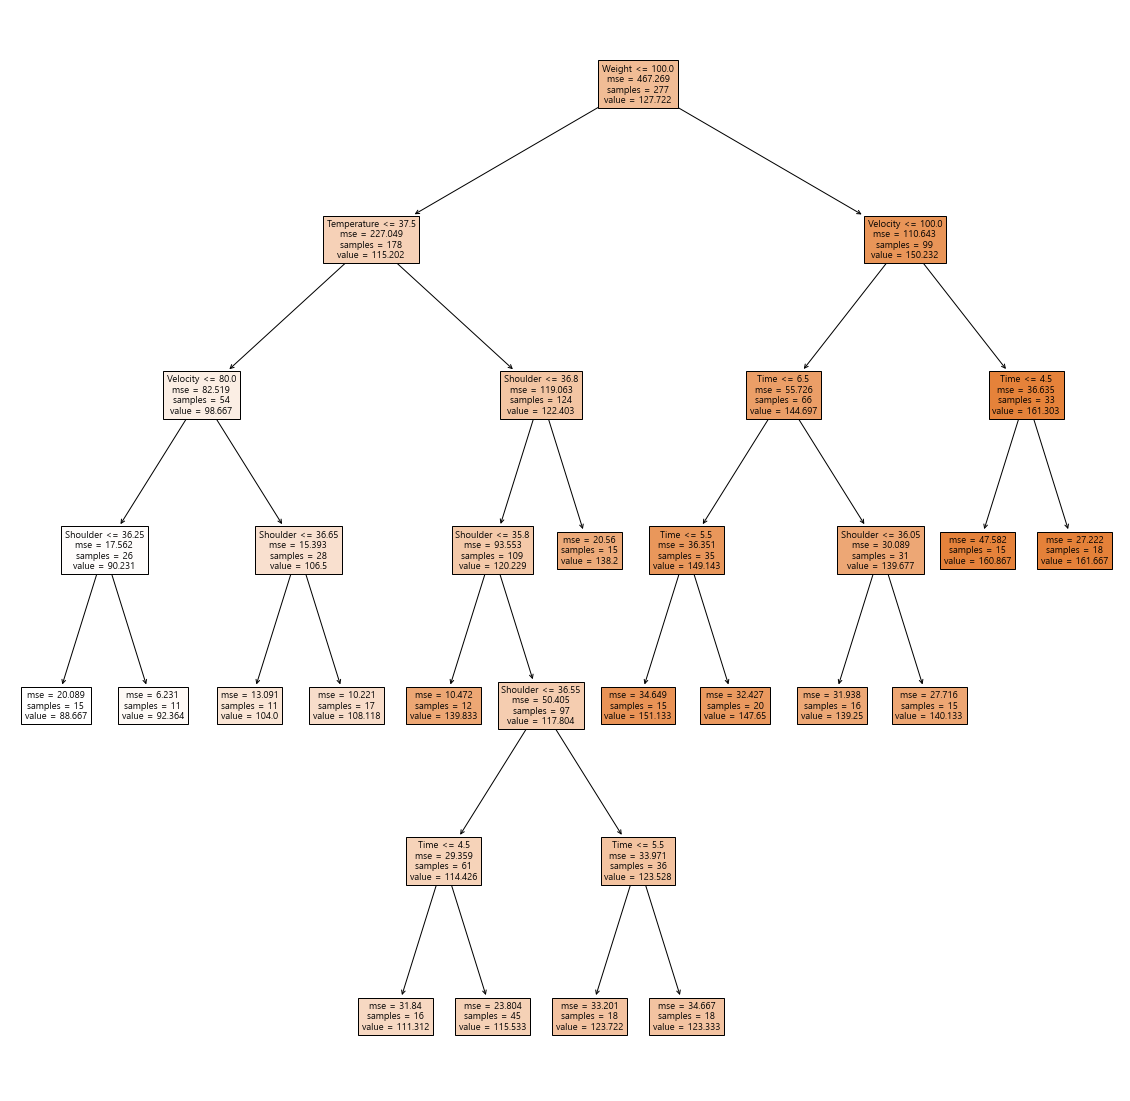

In [38]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 6, min_samples_split=14, max_depth=6)
tree_graph.fit(df_train_x, df_train_y)
plt.figure(figsize = (20, 20))
plot_tree(tree_graph, feature_names=df_tire_x.columns, filled = True);

In [40]:
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [39]:
para_split

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

In [41]:
para_leaf

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
df_scores = pd.DataFrame()
df_scores['Depth'] = para_depth
df_scores['TrainScore'] = train_score
df_scores['TestScore'] = test_score

df_score_depth.round(3)